# HW2 - Machine Perception


## Q3 Pickup a set of data, including Image, Lidar, and Radar data. Visualize them respectively.

## Initialization

In [1]:
%matplotlib inline
from nuscenes.nuscenes import NuScenes
import cv2
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt


nusc = NuScenes(version='v1.0-mini', dataroot='/home/df/abhishek/coursework/sem2/perception/assignment2/data/sets/nuscenes', verbose=True)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.369 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


In [114]:
#nusc.list_scenes()

In [173]:
my_scene = nusc.scene[1]
my_scene

{'token': 'fcbccedd61424f1b85dcbf8f897f9754',
 'log_token': '53cf9c55dd8644bea67b9f009fc1ee38',
 'nbr_samples': 40,
 'first_sample_token': '3e8750f331d7499e9b5123e9eb70f2e2',
 'last_sample_token': '281b92269fd648d4b52d06ac06ca6d65',
 'name': 'scene-0103',
 'description': 'Many peds right, wait for turning car, long bike rack left, cyclist'}

In [174]:
scene = nusc.scene[0]
print(scene['nbr_samples'])

39


In [175]:
print(my_scene['first_sample_token'])

3e8750f331d7499e9b5123e9eb70f2e2


### Visualization of sample data from different sensor modalities

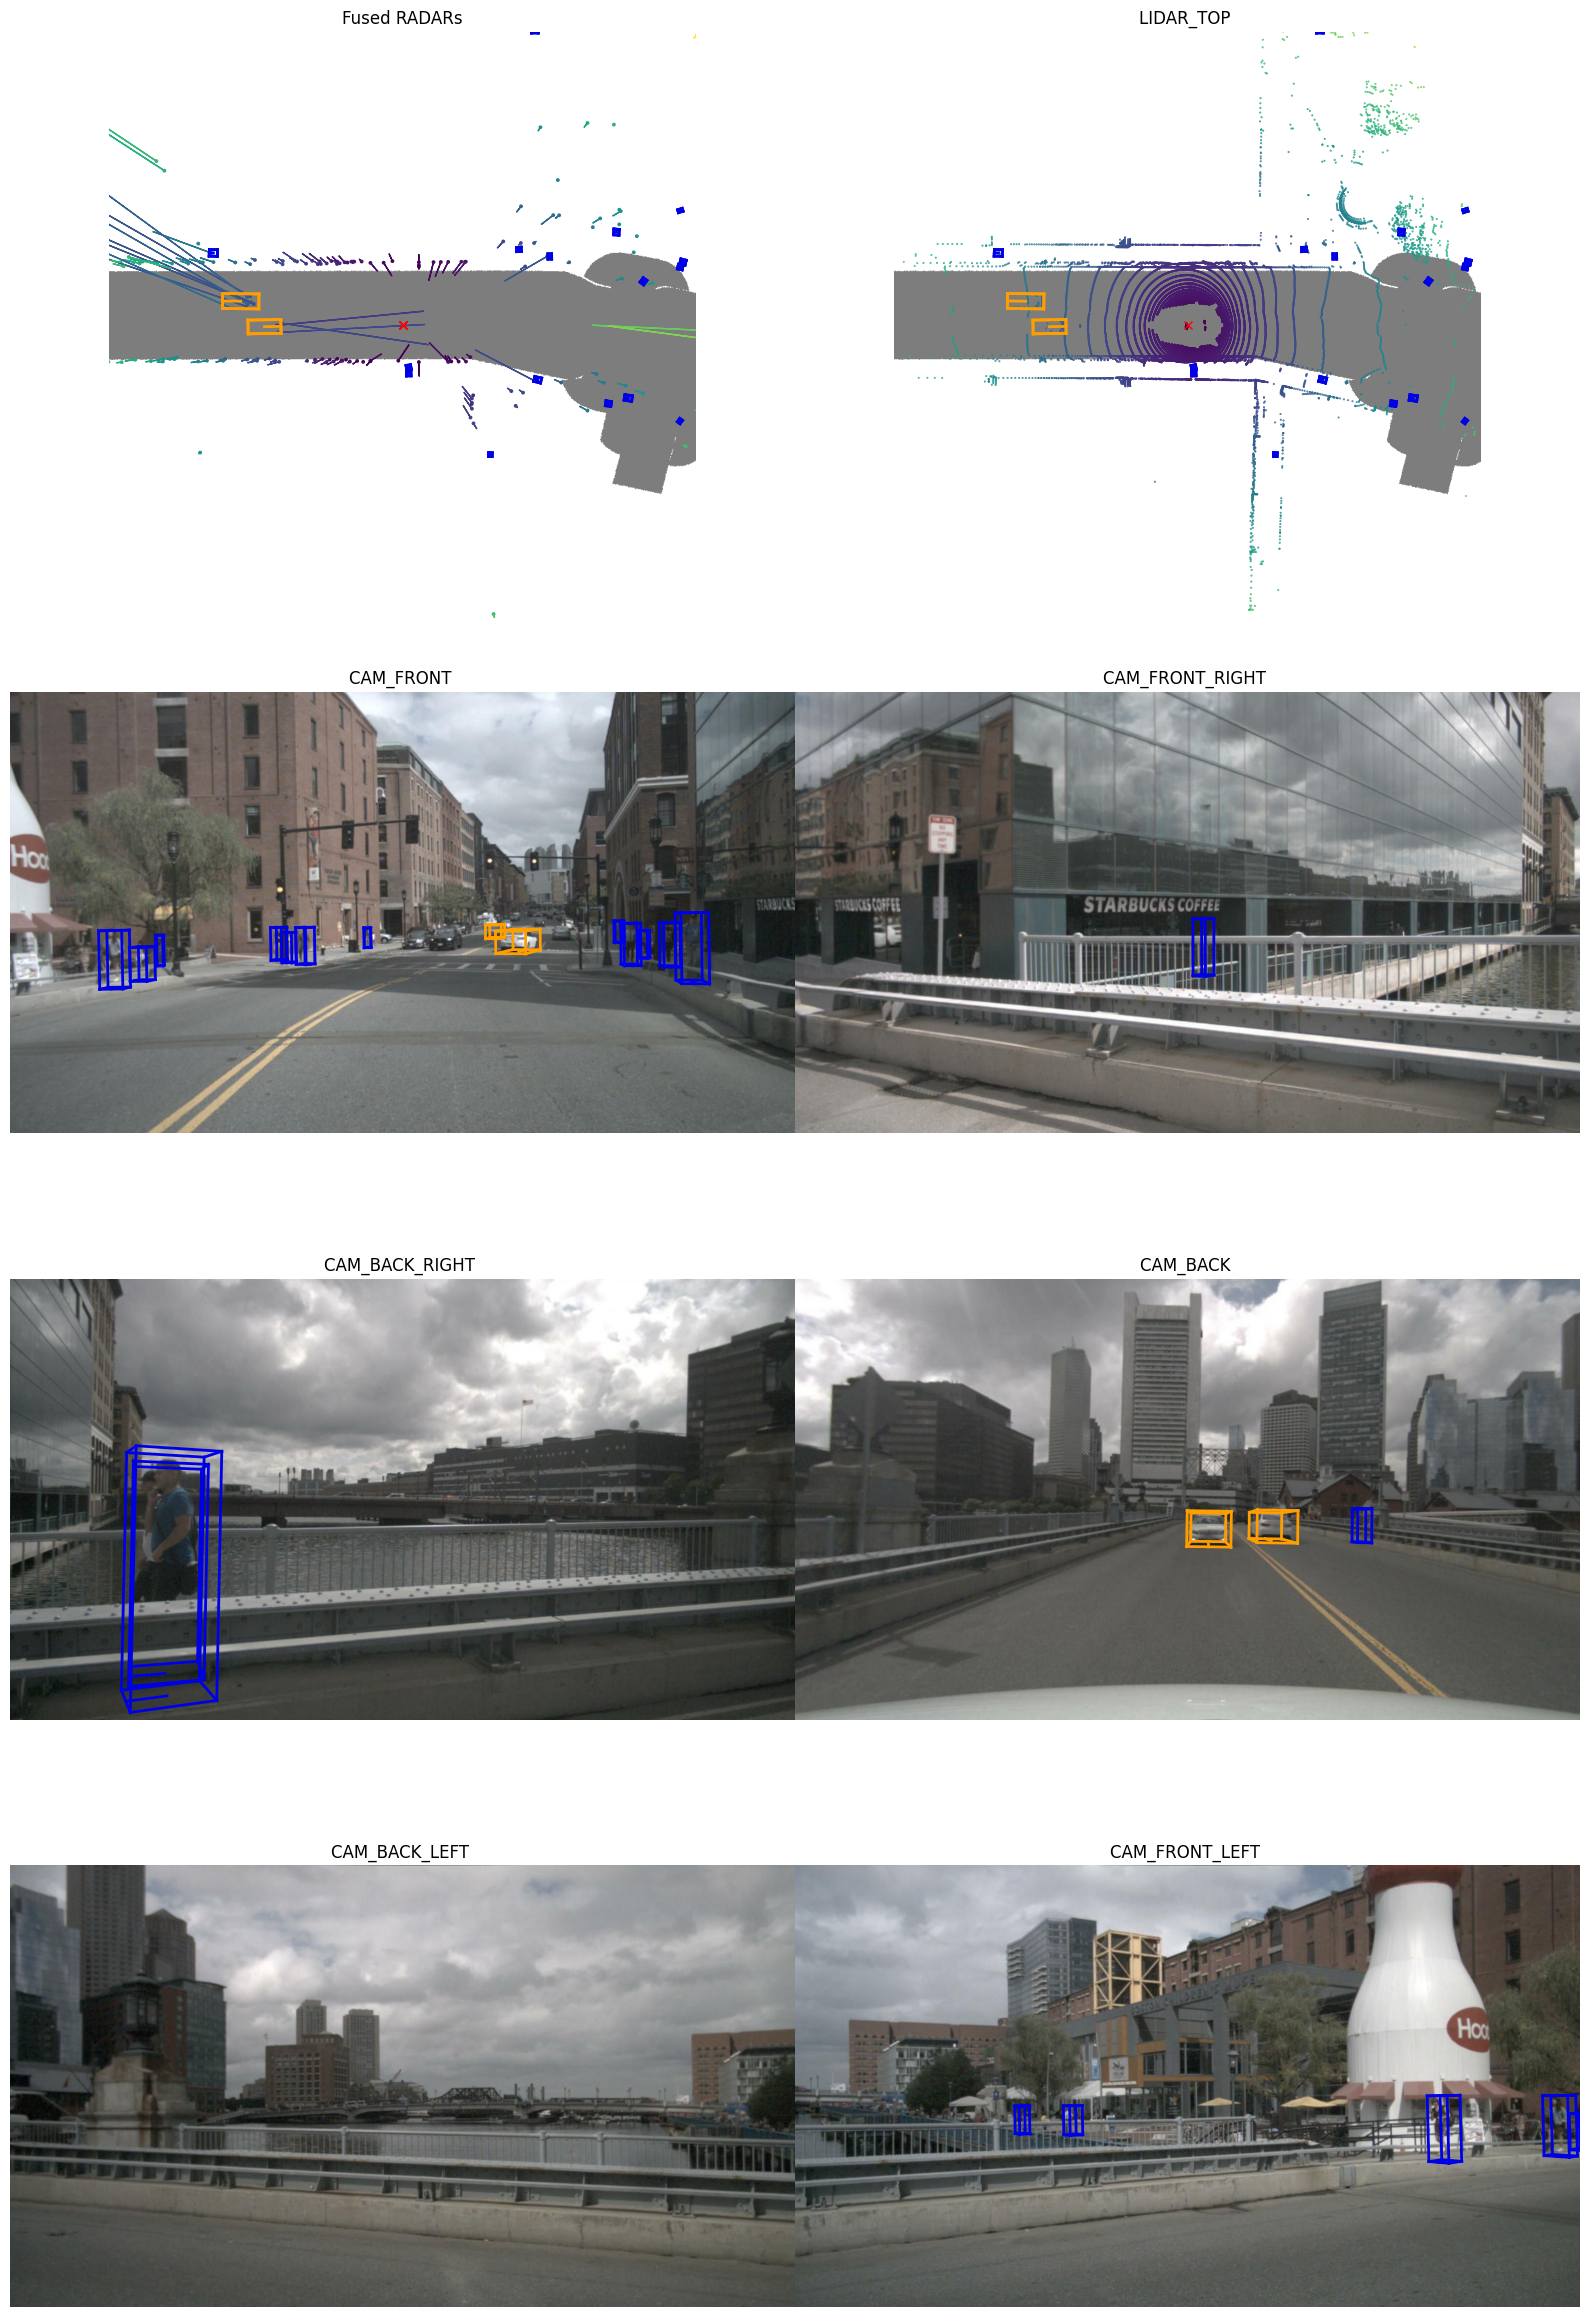

In [176]:
first_sample_token = my_scene['first_sample_token']

# The rendering command below is commented out because it tends to crash in notebooks
nusc.render_sample(first_sample_token)

In [26]:
#nusc.list_sample(my_sample['token'])

In [158]:
my_sample['data']

{'RADAR_FRONT': 'dfce1c7ce9994dc3872ccd4809b56c94',
 'RADAR_FRONT_LEFT': '7d12619bbd414b2f9b476814942378b0',
 'RADAR_FRONT_RIGHT': 'ce13791727d2439885612f5f3615a9a6',
 'RADAR_BACK_LEFT': '697875728d0b4d4e91d2f6280969d5ff',
 'RADAR_BACK_RIGHT': 'b93edfad1c97418d882ded5cfafe1890',
 'LIDAR_TOP': '68dbac351067433883a6303bab0d61ea',
 'CAM_FRONT': '81b6368f6af9417684cefeb6661a14e7',
 'CAM_FRONT_RIGHT': '2a9e64ab90de45d29585bac744a7d22e',
 'CAM_BACK_RIGHT': 'b45608d0d78f4d57bbff3e437f842544',
 'CAM_BACK': '11a2e3da5dde4584b3a3ece6ebabfbe6',
 'CAM_BACK_LEFT': '1a58ca789f7a4573921e5fb9dac77dcd',
 'CAM_FRONT_LEFT': '63f29c2408e0435aa21ac3b3d67696b4'}

## Q4: Visualization using OpenCV and Open3D

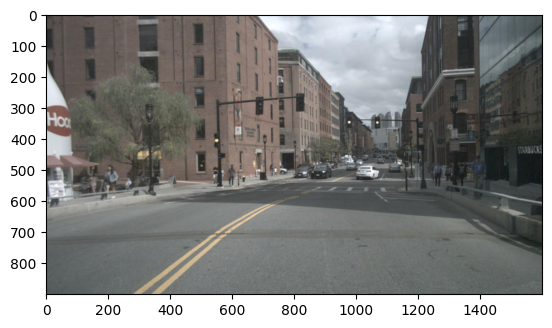

In [13]:
# front camera visualization using open3d and matplotlib

img = cv2.imread('data/sets/nuscenes/samples/CAM_FRONT/n008-2018-08-01-15-16-36-0400__CAM_FRONT__1533151603512404.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)


#cv2.imshow('image',img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [40]:
pcd_name = 'data/sets/nuscenes/samples/LIDAR_TOP/n008-2018-08-01-15-16-36-0400__LIDAR_TOP__1533151603547590.pcd.bin'
scan=np.fromfile(pcd_name, dtype=np.float32)
print(scan)
points = scan.reshape((-1, 5))[:, :4]
print(points[0:3])

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points[:, :3])
o3d.visualization.draw_geometries([pcd])
print(np.asarray(pcd.points).shape)

[-3.1226244e+00 -4.2449394e-01 -1.8768095e+00 ... -1.0212603e-06
  3.0000000e+01  3.1000000e+01]
[[-3.1226244  -0.42449394 -1.8768095   4.        ]
 [-3.2818882  -0.4231298  -1.8687892   5.        ]
 [-3.493328   -0.422217   -1.8820832   6.        ]]
(34752, 3)


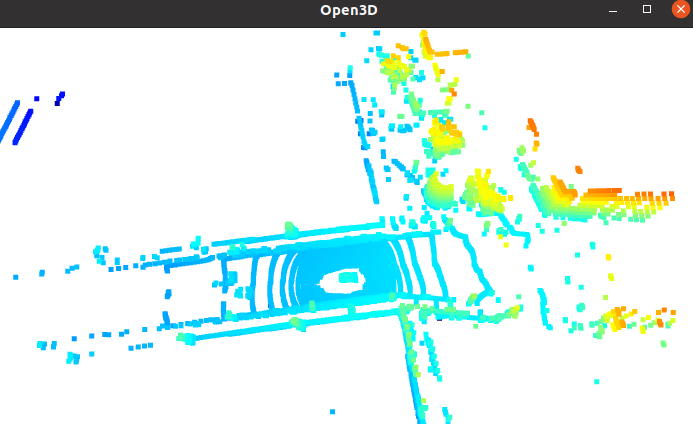

In [15]:
# point cloud with color intensity
l = len(pcd.points)
inten = [point[3] for point in points]
col3 = 1 - 2*np.array(inten)/255
col2 = 0.8 - np.array(inten)/(255)
col1 = 10*np.array(inten)/255
#col2 = np.ones((l))*1/255

max_int = np.min(inten)
print(max_int)

col = np.vstack((col1,col2,col3)).T

print(col[0:5])
print(col.shape)
pcd.colors = o3d.utility.Vector3dVector(col)
o3d.visualization.draw_geometries([pcd])

0.0
[[0.15686275 0.78431374 0.96862745]
 [0.19607843 0.78039217 0.9607843 ]
 [0.23529412 0.7764706  0.9529412 ]
 [0.19607843 0.78039217 0.9607843 ]
 [0.23529412 0.7764706  0.9529412 ]]
(34752, 3)


### Intensity Max = Red | Intensity Min = Blue

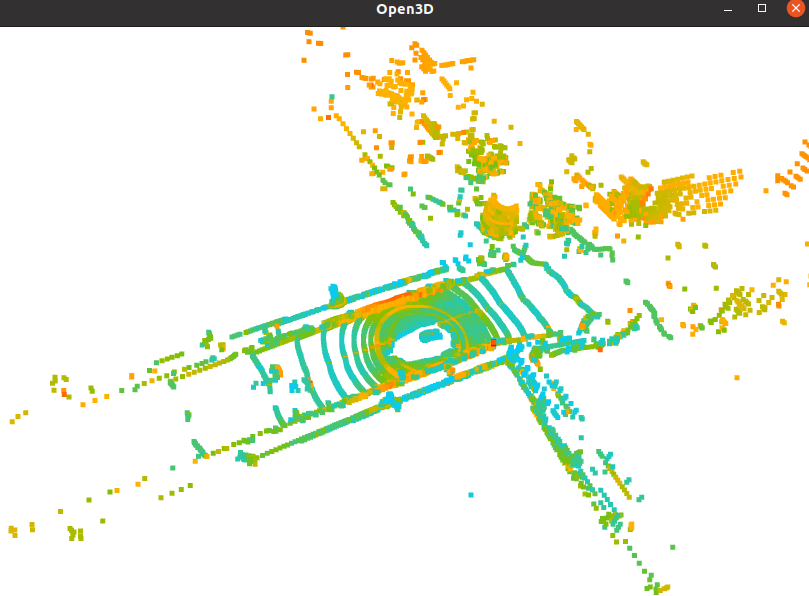

In [95]:
#Semantic labels for lidar pointcloud

seg_name='lidar_seg/lidarseg/v1.0-mini/4484110755904050a880043268149497_lidarseg.bin'
seg=np.fromfile(seg_name, dtype=np.uint8)

color = np.zeros([len(seg), 3])
color[:, 0] = seg/16
color[:, 1] = seg/32
color[:, 2] = 1-seg/16

pcd_name='data/sets/nuscenes/samples/LIDAR_TOP/n008-2018-08-28-16-43-51-0400__LIDAR_TOP__1535489296047917.pcd.bin'
scan=np.fromfile(pcd_name, dtype=np.float32)
points = scan.reshape((-1, 5))[:, :4]


print(len(seg))
print(len(points))

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points[:, :3])
pcd.colors = o3d.utility.Vector3dVector(color)

o3d.visualization.draw_geometries([pcd])

34400
34400


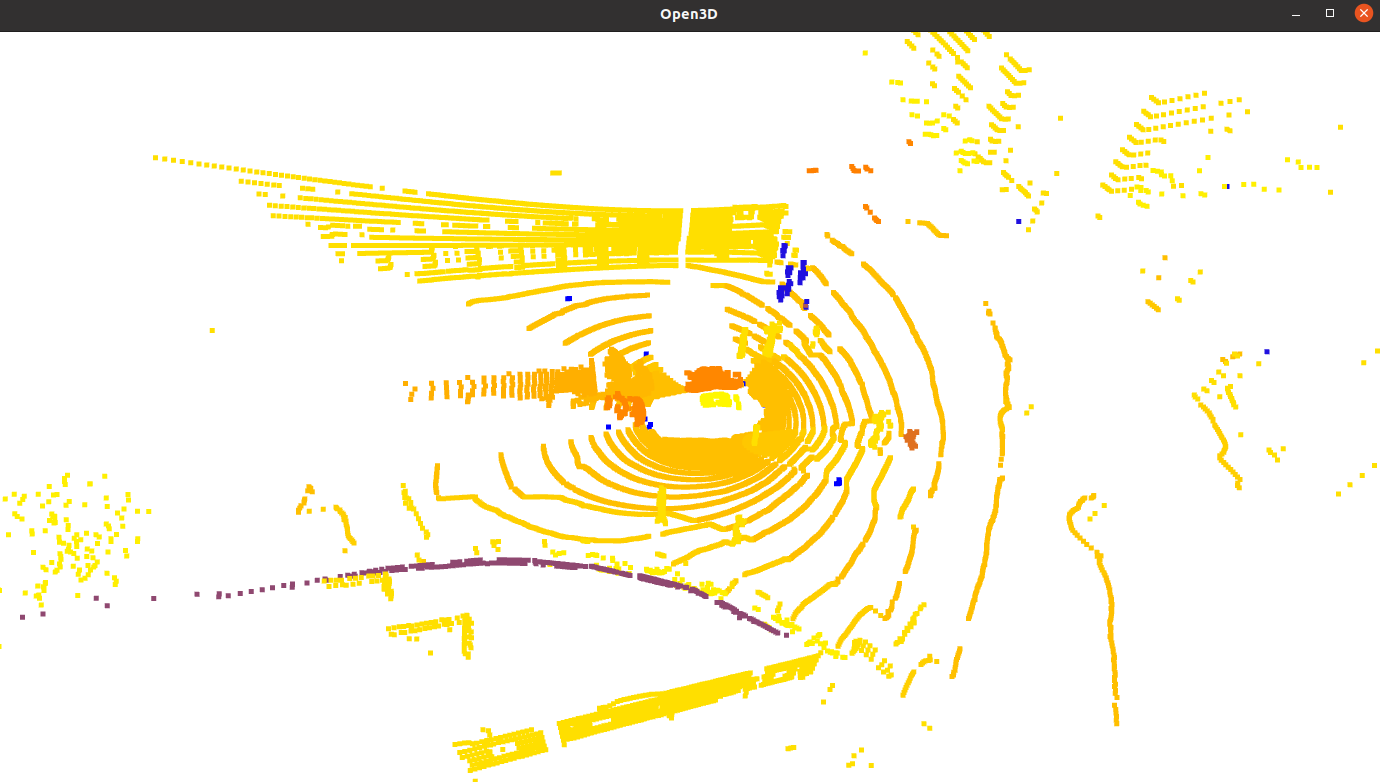

In [120]:
import struct
#import data_classes
#from data_classes import PointCloud

pcd_name = 'data/sets/nuscenes/samples/RADAR_FRONT/n008-2018-08-30-15-16-55-0400__RADAR_FRONT__1535657120161139.pcd'    
scan=np.fromfile(pcd_name, dtype=np.float32)
assert pcd_name.endswith('.pcd'), 'Unsupported filetype {}'.format(file_name)

print(scan)
print(len(scan))



meta = []
with open(pcd_name, 'rb') as f:
    for line in f:
        line = line.strip().decode('utf-8')
        meta.append(line)
        if line.startswith('DATA'):
            break

    data_binary = f.read()

sizes = meta[3].split(' ')[1:]
types = meta[4].split(' ')[1:]
counts = meta[5].split(' ')[1:]
width = int(meta[6].split(' ')[1])
height = int(meta[7].split(' ')[1])
data = meta[10].split(' ')[1]
feature_count = len(types)

assert data == 'binary'

unpacking_lut = {'F': {2: 'e', 4: 'f', 8: 'd'},
                         'I': {1: 'b', 2: 'h', 4: 'i', 8: 'q'},
                         'U': {1: 'B', 2: 'H', 4: 'I', 8: 'Q'}}
types_str = ''.join([unpacking_lut[t][int(s)] for t, s in zip(types, sizes)])

offset = 0
point_count = width
print('width:', width)
points = []
for i in range(point_count):
    point = []
    for p in range(feature_count):
        start_p = offset
        end_p = start_p + int(sizes[p])
        assert end_p < len(data_binary)
        point_p = struct.unpack(types_str[p], data_binary[start_p:end_p])[0]
        point.append(point_p)
        offset = end_p
    points.append(point)

# A NaN in the first point indicates an empty pointcloud.
point = np.array(points[0])
print(point)
# Convert to numpy matrix.
points = np.array(points)
print(points.shape)

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points[:, :3])
o3d.visualization.draw_geometries([pcd])
print(np.asarray(pcd.points).shape)
# pcd = o3d.geometry.PointCloud()
# pcd.points = o3d.utility.Vector3dVector(points[:, :3])
# o3d.visualization.draw_geometries([pcd])
# print(np.asarray(pcd.points).shape)

[1.1685367e+10 8.1264845e+32 1.5515985e-19 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00]
2367
width: 125
[ 5.80000019e+00  7.50000000e+00  0.00000000e+00  1.00000000e+00
  0.00000000e+00  9.50000000e+00  0.00000000e+00  0.00000000e+00
 -2.33217701e-03 -3.01574660e-03  1.00000000e+00  3.00000000e+00
  1.90000000e+01  1.90000000e+01  0.00000000e+00  1.00000000e+00
  1.80000000e+01  3.00000000e+00]
(125, 18)
(125, 3)


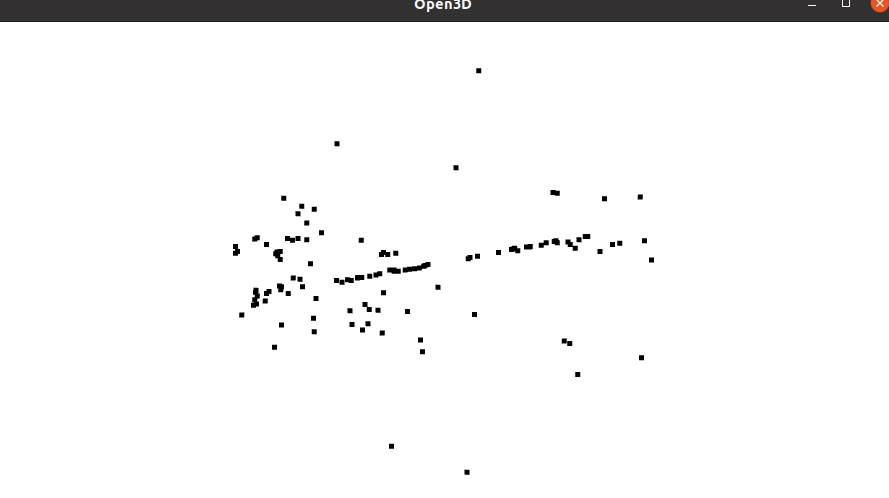

In [157]:
#Colorize radar points with distance
dist = np.linalg.norm(points[:,:3], axis=1)

col3 = 1 - 2*(dist)/max(dist)
col2 = 1 - (dist)/max(dist)
col1 = 2*(dist)/max(dist)

col = np.vstack((col1,col2*0,col3)).T

pcd.points = o3d.utility.Vector3dVector(points[:, :3])
pcd.colors = o3d.utility.Vector3dVector(col)
o3d.visualization.draw_geometries([pcd])

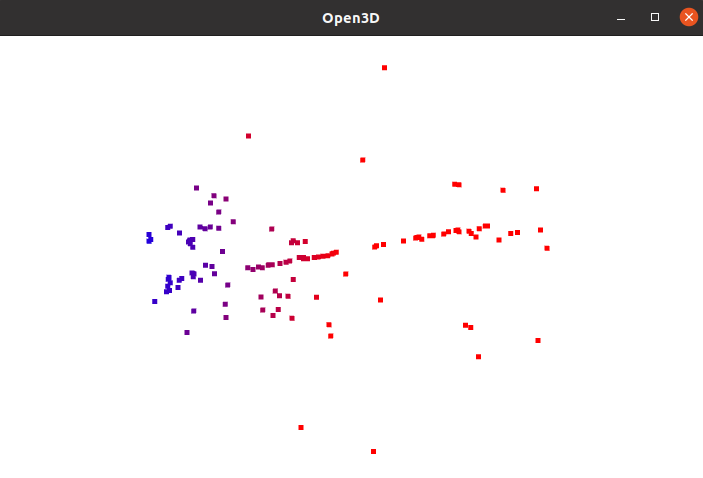

In [155]:
#Colorize radar points with velocity

vel = np.array(points[:,7:9])
vel_abs = np.linalg.norm(vel, axis=1)
print(len(vel_abs))
col3 = 1 - 2*(vel_abs)/max(vel_abs)
col2 = 1 - (vel_abs)/max(vel_abs)
col1 = 2*(vel_abs)/max(vel_abs)

col = np.vstack((col1,col2*0,col3)).T

pcd.points = o3d.utility.Vector3dVector(points[:, :3])
pcd.colors = o3d.utility.Vector3dVector(col)
o3d.visualization.draw_geometries([pcd])




125


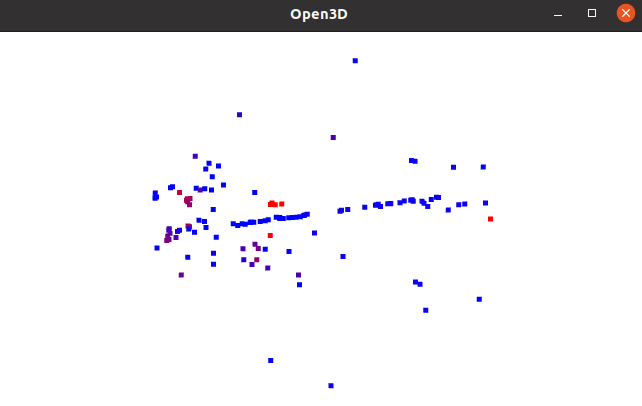

## Q5

In [159]:
my_sample['data']

{'RADAR_FRONT': 'dfce1c7ce9994dc3872ccd4809b56c94',
 'RADAR_FRONT_LEFT': '7d12619bbd414b2f9b476814942378b0',
 'RADAR_FRONT_RIGHT': 'ce13791727d2439885612f5f3615a9a6',
 'RADAR_BACK_LEFT': '697875728d0b4d4e91d2f6280969d5ff',
 'RADAR_BACK_RIGHT': 'b93edfad1c97418d882ded5cfafe1890',
 'LIDAR_TOP': '68dbac351067433883a6303bab0d61ea',
 'CAM_FRONT': '81b6368f6af9417684cefeb6661a14e7',
 'CAM_FRONT_RIGHT': '2a9e64ab90de45d29585bac744a7d22e',
 'CAM_BACK_RIGHT': 'b45608d0d78f4d57bbff3e437f842544',
 'CAM_BACK': '11a2e3da5dde4584b3a3ece6ebabfbe6',
 'CAM_BACK_LEFT': '1a58ca789f7a4573921e5fb9dac77dcd',
 'CAM_FRONT_LEFT': '63f29c2408e0435aa21ac3b3d67696b4'}

In [235]:
pcd_sensor_token1 = my_sample['data']['LIDAR_TOP']
print(pcd_sensor_token1)

68dbac351067433883a6303bab0d61ea


In [236]:
pcd_sensor_token2 = my_sample['data']['RADAR_FRONT']
print(pcd_sensor_token2)

dfce1c7ce9994dc3872ccd4809b56c94


In [237]:
camera_token = my_sample['data']['CAM_FRONT']
print(camera_token)

81b6368f6af9417684cefeb6661a14e7


In [240]:
pointsensor = nu.nusc.get('sample_data', pcd_sensor_token2)

nu.nusc.get('calibrated_sensor', pointsensor['calibrated_sensor_token'])

{'token': 'f4d2a6c281f34a7eb8bb033d82321f79',
 'sensor_token': '47fcd48f71d75e0da5c8c1704a9bfe0a',
 'translation': [3.412, 0.0, 0.5],
 'rotation': [0.9999984769132877, 0.0, 0.0, 0.0017453283658983088],
 'camera_intrinsic': []}

In [243]:
poserecord = nu.nusc.get('ego_pose', pointsensor['ego_pose_token'])
print(poserecord)

{'token': 'dfce1c7ce9994dc3872ccd4809b56c94', 'timestamp': 1532402932641364, 'rotation': [0.6025019136612034, -0.0005668321052868677, 0.009612654559019568, -0.7980593459187613], 'translation': [399.03038970945573, 1144.4352266872345, 0.0]}


In [247]:
cam = nu.nusc.get('sample_data', camera_token)
poserecord = nu.nusc.get('ego_pose', cam['ego_pose_token'])
print(poserecord)

{'token': '81b6368f6af9417684cefeb6661a14e7', 'timestamp': 1532402932612460, 'rotation': [0.6021369420782128, -0.0007672518710472424, 0.0098126435930323, -0.7983321528881204], 'translation': [399.0821159176494, 1144.61525027191, 0.0]}


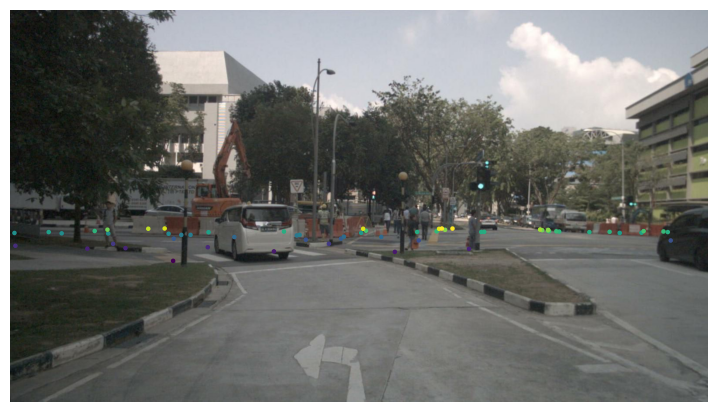

In [172]:
my_sample = nusc.sample[10]
nusc.render_pointcloud_in_image(my_sample['token'], pointsensor_channel='RADAR_FRONT')

In [238]:
from nuscenes.nuscenes import NuScenesExplorer
nu = NuScenesExplorer(nusc)
points,col,img = nu.map_pointcloud_to_image(pcd_sensor_token,camera_token)

pointsensor = nu.nusc.get('sample_data', pcd_sensor_token1)

nu.nusc.get('calibrated_sensor', pointsensor['calibrated_sensor_token'])

{'token': 'a183049901c24361a6b0b11b8013137c',
 'sensor_token': 'dc8b396651c05aedbb9cdaae573bb567',
 'translation': [0.943713, 0.0, 1.84023],
 'rotation': [0.7077955119163518,
  -0.006492242056004365,
  0.010646214713995808,
  -0.7063073142877817],
 'camera_intrinsic': []}

0.17629804


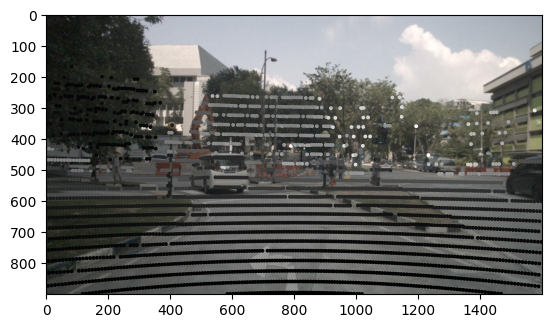

In [239]:
pc_2d = points.transpose()[:, :2]
inten = col/255
print(inten[0])
x = pc_2d[:, 0]
plt.scatter(x,y, c = inten, s=3)
plt.imshow(img)

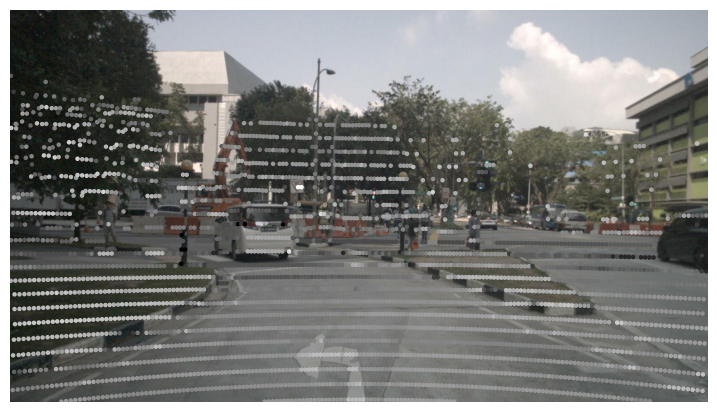

In [232]:
nusc.render_pointcloud_in_image(my_sample['token'], pointsensor_channel='LIDAR_TOP', render_intensity=True)